In [25]:
# IMPORTS ET CONFIGURATION
# ============================================


import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import os
from datetime import datetime


print("✅ Bibliothèques importées")
print(f"📅 Date : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


# ==============================================================================
# CONFIGURATION PLOTLY
# ==============================================================================


# Thème sombre
pio.templates.default = "plotly_dark"


# Palette de couleurs cohérente avec le site
COLOR_SCALE = [
   '#E50914',  # Rouge cinéma
   '#D4AF37',  # Or
   '#00C853',  # Vert
   '#1E88E5',  # Bleu
   '#9C27B0',  # Violet
]


# Configuration globale des graphiques (boutons, export, etc.)
config = {
   'displayModeBar': True,
   'displaylogo': False,
   'modeBarButtonsToRemove': ['lasso2d', 'select2d'],
   'toImageButtonOptions': {
       'format': 'png',
       'filename': 'movie_analysis',
       'height': 1080,
       'width': 1920,
       'scale': 2
   }
}


print("✅ Plotly configuré en mode dark")


# ==============================================================================
# CHARGEMENT DES DONNÉES
# ==============================================================================


df = pd.read_csv('../data/processed/movies_clean.csv')


# Créer le dossier outputs si nécessaire
os.makedirs('../outputs/figures', exist_ok=True)


print(f"\n📊 Dataset chargé : {len(df):,} films")
print(f"📅 Période : {int(df['release_year'].min())} - {int(df['release_year'].max())}")
print(f"💰 Montants ajustés inflation 2024")
print(f"\n✅ Prêt pour créer 3 visualisations interactives !")


✅ Bibliothèques importées
📅 Date : 2026-01-21 22:58:33
✅ Plotly configuré en mode dark

📊 Dataset chargé : 7,632 films
📅 Période : 1980 - 2023
💰 Montants ajustés inflation 2024

✅ Prêt pour créer 3 visualisations interactives !



GRAPHIQUE : SCATTER BUDGET VS REVENUE (SYNTHÈSE INTERACTIVE)


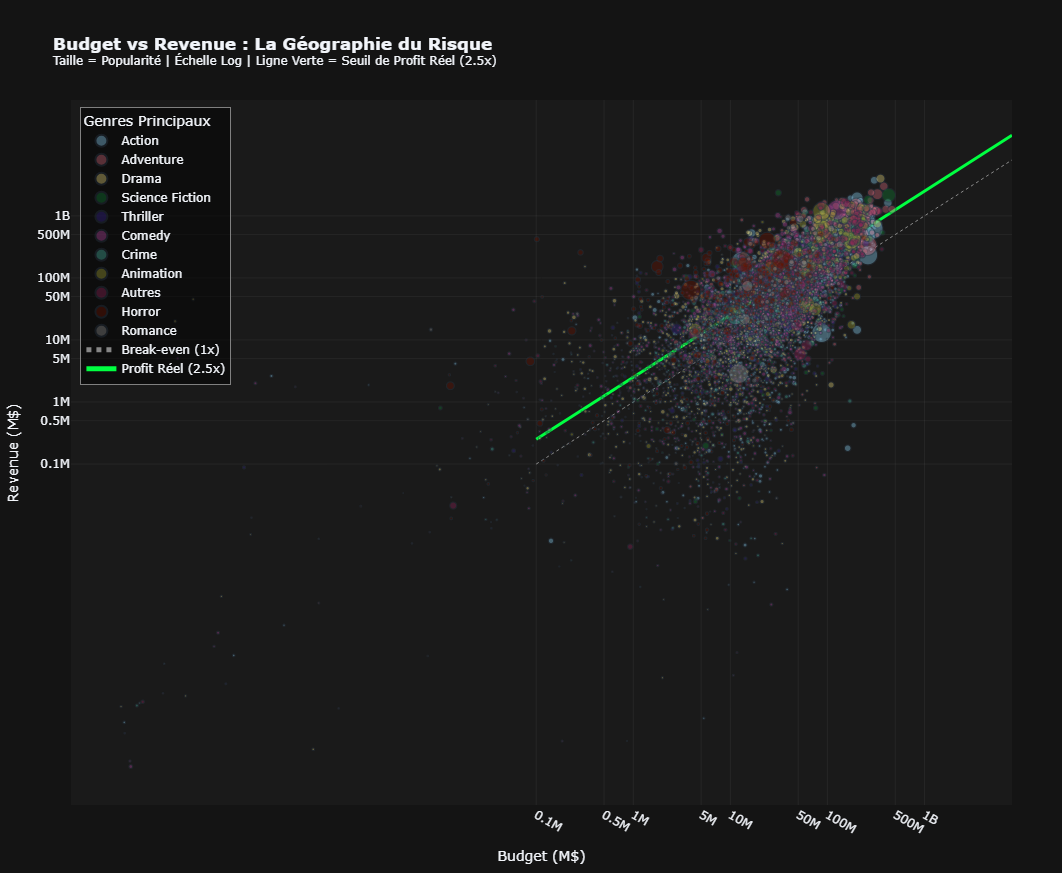

✅ Analyse terminée sur 7,632 films.
💾 Graphique sauvegardé sous : synthèse_interactive_budget_revenue.html


In [26]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

print("\n" + "="*80)
print("GRAPHIQUE : SCATTER BUDGET VS REVENUE (SYNTHÈSE INTERACTIVE)")
print("="*80)

# 1. Préparation et Nettoyage
df_scatter = df.copy()

# Filtrage strict pour l'échelle logarithmique (valeurs > 0 obligatoires)
df_scatter = df_scatter[(df_scatter['budget_million'] > 0) & (df_scatter['revenue_million'] > 0)].copy()

# Regroupement des genres mineurs pour la clarté de la légende (Top 10 + Autres)
top_genres = df_scatter['main_genre'].value_counts().nlargest(10).index
df_scatter['genre_groupe'] = df_scatter['main_genre'].apply(lambda x: x if x in top_genres else 'Autres')

# 2. Configuration des visuels
# Ajustement de la taille des bulles (Popularité)
df_scatter['bubble_size'] = df_scatter['popularity'].clip(0, 500) # Clip pour éviter des bulles géantes

# Texte au survol (Tooltips)
df_scatter['hover_text'] = (
    '<b>' + df_scatter['title'] + '</b><br>' +
    '📅 Année : ' + df_scatter['release_year'].astype(str) + '<br>' +
    '🎭 Genre : ' + df_scatter['main_genre'] + '<br>' +
    '💰 Budget : ' + df_scatter['budget_million'].map('{:.1f}M$'.format) + '<br>' +
    '💵 Revenu : ' + df_scatter['revenue_million'].map('{:.1f}M$'.format) + '<br>' +
    '📈 ROI : ' + df_scatter['roi'].map('{:.2f}'.format) + '<br>' +
    '⭐ Note : ' + df_scatter['vote_average'].astype(str) + '/10'
)

# 3. Création du Graphique
fig1 = px.scatter(
    df_scatter,
    x='budget_million',
    y='revenue_million',
    color='genre_groupe',
    size='bubble_size',
    custom_data=['hover_text'],
    title='<b>Budget vs Revenue : La Géographie du Risque</b><br><sup>Taille = Popularité | Échelle Log | Ligne Verte = Seuil de Profit Réel (2.5x)</sup>',
    labels={'budget_million': 'Budget (M$)', 'revenue_million': 'Revenue (M$)', 'genre_groupe': 'Genre'},
    color_discrete_sequence=px.colors.qualitative.Safe,
    opacity=0.4, # Opacité réduite pour voir la densité des points
    height=850
)

# Mise à jour du hover
fig1.update_traces(hovertemplate='%{customdata[0]}<extra></extra>')

# 4. Ajout des Lignes de Référence (Rentabilité)
max_val = max(df_scatter['budget_million'].max(), df_scatter['revenue_million'].max()) * 2
line_range = np.array([0.1, max_val])

# Ligne de Break-even Technique (Revenue = Budget)
fig1.add_trace(go.Scatter(
    x=line_range, y=line_range,
    mode='lines', name='Break-even (1x)',
    line=dict(color='white', width=1, dash='dot'),
    opacity=0.5
))

# Ligne de Rentabilité Réelle (Revenue = 2.5 * Budget)
fig1.add_trace(go.Scatter(
    x=line_range, y=line_range * 2.5,
    mode='lines', name='Profit Réel (2.5x)',
    line=dict(color='#00FF41', width=3), # Vert fluo
    hovertemplate='Success Zone : Revenu > 2.5x Budget<extra></extra>'
))

# 5. Configuration des Axes Logarithmiques
tickvals = [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
ticktext = ['0.1M', '0.5M', '1M', '5M', '10M', '50M', '100M', '500M', '1B']

fig1.update_layout(
    template='plotly_dark',
    plot_bgcolor='#1a1a1a',
    paper_bgcolor='#141414',
    margin=dict(l=50, r=50, t=100, b=50),
    xaxis=dict(
        type="log", tickmode='array', tickvals=tickvals, ticktext=ticktext,
        gridcolor='rgba(255,255,255,0.05)', zeroline=False, title_font=dict(size=14)
    ),
    yaxis=dict(
        type="log", tickmode='array', tickvals=tickvals, ticktext=ticktext,
        gridcolor='rgba(255,255,255,0.05)', zeroline=False, title_font=dict(size=14)
    ),
    legend=dict(
        title="Genres Principaux",
        bgcolor='rgba(0,0,0,0.5)',
        bordercolor='gray',
        borderwidth=1,
        yanchor="top", y=0.99, xanchor="left", x=0.01
    )
)

# Affichage et Sauvegarde
fig1.show()
fig1.write_html('../outputs/figures/synthèse_interactive_budget_revenue.html')

print(f"✅ Analyse terminée sur {len(df_scatter):,} films.")
print(f"💾 Graphique sauvegardé sous : synthèse_interactive_budget_revenue.html")

In [27]:
import pandas as pd
import numpy as np
import plotly.express as px

# =============================
# Agrégation pays — logique investisseur
# =============================
MIN_FILMS = 20
df_pays = df.copy()
# Sécurité type
df_pays["is_profitable"] = df_pays["is_profitable"].astype(int)
# Perte quand flop (en M$)
df_pays["loss_million"] = np.where(
    df_pays["is_profitable"] == 0,
    (-df_pays["profit_million"]).clip(lower=0),
    0
)
# Agrégation robuste
agg = (
    df_pays.groupby("main_country")
    .agg(
        nb_films=("title", "count"),
        profit_rate=("is_profitable", "mean"),
        roi_median=("roi", "median"),
        loss_median_flop=("loss_million", lambda s: np.median(s[s > 0]) if (s > 0).any() else 0),
        budget_median=("budget_million", "median"),
        revenue_median=("revenue_million", "median"),
    )
    .reset_index()
)
# Filtrage pays significatifs
agg = agg[agg["nb_films"] >= MIN_FILMS].copy()
agg["profit_rate_pct"] = agg["profit_rate"] * 100
print(f"✅ Pays analysés : {len(agg)}")
print(agg.head())

# ← AJOUTER À PARTIR D'ICI
# Créer le graphique interactif
fig = px.scatter(
    agg,
    x='roi_median',
    y='profit_rate_pct',
    size='nb_films',
    color='loss_median_flop',
    hover_name='main_country',
    title=f'Analyse Risque/Rentabilité par Pays (≥ {MIN_FILMS} films)'
)

# Sauvegarder
fig.write_html('../outputs/figures/interactive_pays_risque_rentabilite.html')

print("✅ Graphique sauvegardé !")

✅ Pays analysés : 26
   main_country  nb_films  profit_rate  roi_median  loss_median_flop  \
0            AU       142     0.605634    0.438215         10.766466   
2     Argentina        30     0.600000    0.251426          2.628882   
5            BR        27     0.518519    0.456707          3.875469   
9       Belgium       119     0.403361   -0.380387          6.997593   
10     Bulgaria        23     0.478261   -0.124579          9.634775   

    budget_median  revenue_median  profit_rate_pct  
0       24.739000       30.876228        60.563380  
2        4.833591        9.851969        60.000000  
5        5.115000       13.224000        51.851852  
9       11.742000        4.715917        40.336134  
10      34.250000       19.464918        47.826087  
✅ Graphique sauvegardé !


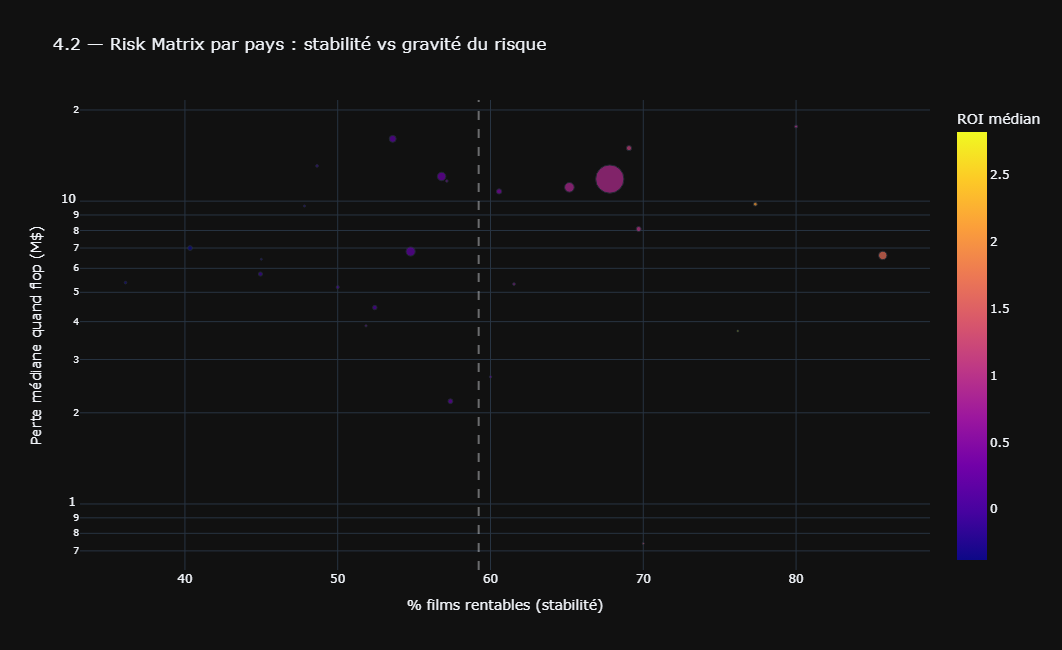

In [28]:
import plotly.express as px

fig = px.scatter(
    agg,
    x="profit_rate_pct",
    y="loss_median_flop",
    size="nb_films",
    color="roi_median",
    hover_name="main_country",
    hover_data={
        "nb_films": True,
        "profit_rate_pct": ':.1f',
        "roi_median": ':.2f',
        "loss_median_flop": ':.1f',
        "budget_median": ':.1f',
        "revenue_median": ':.1f'
    },
    title="4.2 — Risk Matrix par pays : stabilité vs gravité du risque",
    labels={
        "profit_rate_pct": "% films rentables (stabilité)",
        "loss_median_flop": "Perte médiane quand flop (M$)",
        "roi_median": "ROI médian"
    },
    template="plotly_dark"
)

# Échelle log (pertes très étalées)
fig.update_yaxes(type="log")

# Ligne de référence (stabilité moyenne)
fig.add_vline(
    x=agg["profit_rate_pct"].mean(),
    line_dash="dash",
    opacity=0.4
)

fig.update_layout(height=650)
fig.write_html('../outputs/figures/rix_matrix_par_pays.html')
fig.show()